# Milestone 2 - AUTOMATIC TICKET ASSIGNMENT



# Problem Statement

Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service

# Business Value Proposition

In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings

# Modeling Objective

Develop a model for automatic ticket assignment to the relevant team so that problem addressal can be done in an efficient manner that reduces time for resolution

# Brief Summary of Milestone1 Submission

- The text data was cleaned, relationships understood 
- Word2Vec (unigram) and Glove (200d) were tried out for the modeling

# Milestone 2

This is the stage where new models and existing models would be finetuned to improve accuracy
- in this stage, n-gram Wor2Vec models along with Glove are explored
- Given the sample imbalance in the Groups, Re-Sampling procedures done to get more balanced samples
- Model fine tuning done to improve accuracies

The new_df pandadataframe was saved and imported for this session

In [1]:
# Libraries Used

In [1]:
pip install keras-self-attention

Processing c:\users\shiv\appdata\local\pip\cache\wheels\7b\05\a0\99c0cf60d383f0494e10eca2b238ea98faca9a1fe03cac2894\keras_self_attention-0.42.0-cp37-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Utilities
import os
import zipfile, warnings
import sys
!{sys.executable} -m spacy download en
from time import time
#import cv2

# Numerical calculation
import numpy as np

# Data Handling
import pandas as pd

# Tools & Evaluation metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve
from sklearn.manifold import TSNE

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
output_notebook()
import cufflinks
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

import re # for applying Regex pattern to subject strings

# NLP toolkits
import spacy
import nltk as nltk
from nltk import tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.parsing import preprocessing
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.phrases import Phraser
from gensim.models import Phrases, CoherenceModel
from gensim.models import Word2Vec

# Sequential Modeling
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import *
from keras.utils.np_utils import to_categorical
from keras.initializers import Constant
import keras.backend as K
from keras import initializers
from keras.engine.topology import Layer, InputSpec
from keras.models import Model, Sequential
from keras.layers import Dense, LSTM, TimeDistributed, Conv1D, MaxPooling1D
from keras.layers import Embedding, Activation, Dropout, Flatten, Bidirectional
from keras.layers import Permute, merge, Input, multiply, concatenate
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers, constraints, initializers, activations
from keras.layers.recurrent import Recurrent
from keras.engine import InputSpec
from keras_self_attention import SeqSelfAttention

from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

symbolic link created for C:\ProgramData\Anaconda3\lib\site-packages\spacy\data\en <<===>> C:\ProgramData\Anaconda3\lib\site-packages\en_core_web_sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[+] Linking successful
C:\ProgramData\Anaconda3\lib\site-packages\en_core_web_sm -->
C:\ProgramData\Anaconda3\lib\site-packages\spacy\data\en
You can now load the model via spacy.load('en')


Loading BokehJS ...

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of 

In [2]:
os.chdir('D:\GreatLakes\Capstone\Python Code') # Set the working directory

In [3]:
new_df = pd.read_csv('new_df.csv') # importing the saved csv file
new_df.head()

,Short description,Description,Caller,Assignment group,Total,Clean Description
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,login issue verify user detail employee manage...
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook receive from hello team meeting skype ...,outlook team meeting skype etc not appear cale...
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from hi i can no...,can not log vpn not best
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error


# Modeling

In Milestone 1, Word2Vec embedding were generated with uni-grams. At this stage, Word2Vec embeddings would be generated incorporating bigrams and trigrams to check whether this improves accuracy (as it was observed that there were many bigrams and trigrams present with large frequencies) 

In [5]:
# Initialize spacy 'en' medium model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [6]:
# Function to create the tokenized sentence
def tokenize_sentences(sentence):
    doc = nlp(sentence)
    return [token.lemma_ for token in doc if token.lemma_ !='-PRON-' and not token.is_stop]

sentence_stream=[]
for sent in new_df['Clean Description'].values.tolist():
    sentence_stream.append(tokenize_sentences(sent))

In [7]:
# Create the Bigram and Trigram models
bigram = Phrases(sentence_stream, min_count=2, threshold=2)
trigram = Phrases(bigram[sentence_stream], min_count=2, threshold=1)
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)
ngram_sentences=[]
for sent in sentence_stream:
    tokens_ = bigram_phraser[sent]
    #print("Bigrams Tokens:\t", tokens_)
    tokens_ = trigram_phraser[tokens_]
    ngram_sentences.append(tokens_)

In [8]:
#Creating the tagged documents
documents = [TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(ngram_sentences)]
print("Length of Tagged Documents:",len(documents))
print("Tagged Documents[0]:",documents[0])

Length of Tagged Documents: 8500
Tagged Documents[0]: TaggedDocument(['login_issue_verify_user', 'detail_employee_manager_check', 'ad_reset_password_advise', 'check_caller_confirm_resolve'], [0])


In [10]:
#Generating embedding of the size 1000
max_epochs = 100
model_1000 = Doc2Vec(vector_size=1000,window=2,
                alpha=0.025, 
                min_alpha=0.00025,
                min_count=2,
                dm =1)
model_1000.build_vocab(documents)

for epoch in range(max_epochs):
    model_1000.train(documents, 
                total_examples=model_1000.corpus_count,
                epochs=model_1000.iter)
    # decrease the learning rate
    model_1000.alpha -= 0.0002
    # fix the learning rate, no decay
    model_1000.min_alpha = model_1000.alpha

model_1000.save("w2v_1000.mdl")
print("Model Saved")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning:

Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).



Model Saved


# Modeling

In [4]:
model_df = new_df[{'Clean Description','Assignment group'}]

In [5]:
cols = ['Assignment group']
for col in cols:
    val = new_df[col].value_counts()
    y = val[val < 30].index # all groups with less than 30 records will be combined into others
    model_df[col] = model_df[col].replace({x:'GRP_99' for x in y})

In [6]:
model_df.head()

,Assignment group,Clean Description
0,GRP_0,login issue verify user detail employee manage...
1,GRP_0,outlook team meeting skype etc not appear cale...
2,GRP_0,can not log vpn not best
3,GRP_0,unable access hr tool page
4,GRP_0,skype error


In [14]:
model_df.to_csv('model_df.csv')

In [15]:
model_df.describe().transpose()

,count,unique,top,freq
Assignment group,8500,36,GRP_0,3976
Clean Description,8500,6634,job fail scheduler from,445


In [7]:
# First to Create a target categorical column
model_df['Assignment group'] = model_df['Assignment group'].astype('category').cat.codes
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Assignment group   8500 non-null   int8  
 1   Clean Description  8500 non-null   object
dtypes: int8(1), object(1)
memory usage: 74.8+ KB


In [293]:
# Model Setting Parameters

In [17]:
max_features = 10000
maxlen = 100
#embedding_size = 1000

In [18]:
tokenizer = Tokenizer(num_words=max_features)

In [19]:
tokenizer.fit_on_texts(model_df['Clean Description'])

In [20]:
X = tokenizer.texts_to_sequences(model_df['Clean Description'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(model_df['Assignment group'])

print("Number of Samples:", len(X))
print(X[367])
print("Number of Labels: ", len(y))
print(y[367])

Number of Samples: 8500
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  131   39   86   11   26 3182
  462 4774]
Number of Labels:  8500
0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [22]:
counter = Counter(y_train)
print(counter)
counter = Counter(y_test)
print(counter)

Counter({0: 3181, 33: 529, 35: 286, 15: 231, 4: 206, 34: 201, 12: 193, 11: 172, 20: 160, 31: 147, 5: 116, 2: 112, 30: 103, 6: 94, 16: 93, 23: 86, 25: 80, 19: 77, 10: 70, 8: 68, 9: 65, 22: 55, 32: 54, 24: 50, 17: 45, 26: 36, 18: 35, 27: 32, 21: 31, 7: 31, 28: 30, 13: 29, 29: 28, 1: 25, 14: 25, 3: 24})
Counter({0: 795, 33: 132, 35: 71, 15: 58, 34: 51, 4: 51, 12: 48, 11: 43, 20: 40, 31: 37, 5: 29, 2: 28, 30: 26, 6: 24, 16: 23, 23: 21, 19: 20, 25: 20, 10: 18, 8: 17, 9: 16, 22: 14, 32: 14, 24: 12, 17: 11, 26: 9, 18: 9, 7: 8, 21: 8, 27: 8, 29: 7, 13: 7, 28: 7, 14: 6, 1: 6, 3: 6})


# Modeling with Word2Vec 1000 dimensions

In [23]:
# Load the Word2Vec model
wmodel = Doc2Vec.load('w2v_1000.mdl')

In [24]:
w2v_weights = wmodel.wv.vectors
vocab_size, embedding_size = w2v_weights.shape
print("Vocabulary Size: {} - Embedding Dim: {}".format(vocab_size, embedding_size))

Vocabulary Size: 7518 - Embedding Dim: 1000


In [25]:
# CREATE the MODEL


model_wv_1000 = Sequential()
model_wv_1000.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=maxlen, 
                        mask_zero=True,
                        trainable=False))
model_wv_1000.add(SpatialDropout1D(0.2))
model_wv_1000.add(Bidirectional(LSTM(128)))
model_wv_1000.add(Dropout(0.2))
model_wv_1000.add(Dense(units=36, activation='softmax'))
model_wv_1000.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_wv_1000.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 1000)         7518000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 1000)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               1156096   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 36)                9252      
Total params: 8,683,348
Trainable params: 1,165,348
Non-trainable params: 7,518,000
_________________________________________________________________
None


In [26]:
# Code for getting Class weight
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced' ,np.unique(y_train) ,y_train)

In [27]:
# Converting to categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [28]:
batch_size = 1000
epochs = 20
history = model_wv_1000.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1,validation_split=0.2)


Train on 5440 samples, validate on 1360 samples
Epoch 1/20
5440/5440 [==============================] - 9s 2ms/step - loss: 2.6477 - accuracy: 0.4167 - val_loss: 2.1578 - val_accuracy: 0.5287
Epoch 2/20
5440/5440 [==============================] - 17s 3ms/step - loss: 2.0304 - accuracy: 0.5369 - val_loss: 1.9177 - val_accuracy: 0.5493
Epoch 3/20
5440/5440 [==============================] - 40s 7ms/step - loss: 1.8415 - accuracy: 0.5561 - val_loss: 1.8256 - val_accuracy: 0.5559
Epoch 4/20
5440/5440 [==============================] - 41s 8ms/step - loss: 1.7184 - accuracy: 0.5676 - val_loss: 1.7166 - val_accuracy: 0.5750
Epoch 5/20
5440/5440 [==============================] - 41s 8ms/step - loss: 1.6006 - accuracy: 0.5915 - val_loss: 1.6367 - val_accuracy: 0.5926
Epoch 6/20
5440/5440 [==============================] - 41s 8ms/step - loss: 1.4924 - accuracy: 0.6075 - val_loss: 1.5719 - val_accuracy: 0.6022
Epoch 7/20
5440/5440 [==============================] - 41s 8ms/step - loss: 1.386

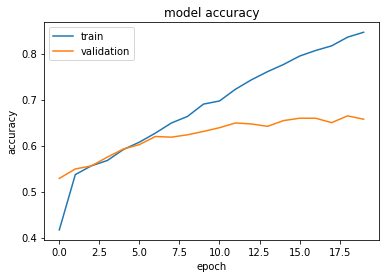

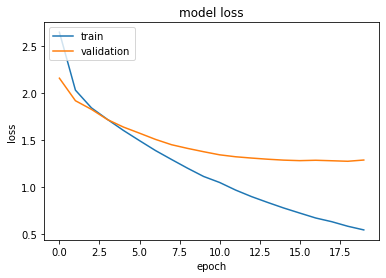

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [61]:
# Generic method to print the classification report
def classification_summary(y_test, y_pred, y_proba):
    print('\033[1mModel accuracy:\033[0m %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('_'*80)
    print('\033[1mConfusion matrix:\033[0m\n %s' % (confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))))
    print('_'*80)
    print('\033[1mClassification report:\033[0m\n %s' % (classification_report(y_test, y_pred)))
    print('_'*80)

In [31]:
# Analyze Classification Summary
y_proba = model_wv_1000.predict([X_test])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_test, y_pred, y_proba)

Model accuracy: 55.82%
________________________________________________________________________________
Confusion matrix:
 [[763   0   0 ...   0   0   3]
 [  2   0   0 ...   1   0   0]
 [ 15   0  10 ...   0   0   0]
 ...
 [ 51   0   1 ...  73   0   0]
 [ 49   0   0 ...   0   1   1]
 [ 55   2   0 ...   3   0   5]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       795
           1       0.00      0.00      0.00         6
           2       0.91      0.36      0.51        28
           3       0.00      0.00      0.00         6
           4       0.60      0.51      0.55        51
           5       0.59      0.34      0.43        29
           6       0.71      0.21      0.32        24
           7       0.50      0.12      0.20         8
           8       0.57      0.24      0.33        17
           9       0.94      0.94      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



Observations: The n-gram Word2Vec model as compared to the unigram Word2Vec model improves the accuracy from 58% to 65%. However it is seen that in the test sample, groups with low record base have very poor accuracy; hence the next trial is to try and balance the samples 

# Applying balancing for Groups

In [32]:
batch_size = 1000
epochs = 20
history = model_wv_1000.fit(X_train, y_train, epochs=epochs, class_weight=class_weight, batch_size=batch_size, verbose=1,validation_split=0.2)

Train on 5440 samples, validate on 1360 samples
Epoch 1/20
5440/5440 [==============================] - 8s 1ms/step - loss: 0.4977 - accuracy: 0.8601 - val_loss: 1.2848 - val_accuracy: 0.6618
Epoch 2/20
5440/5440 [==============================] - 9s 2ms/step - loss: 0.4641 - accuracy: 0.8722 - val_loss: 1.3065 - val_accuracy: 0.6493
Epoch 3/20
5440/5440 [==============================] - 9s 2ms/step - loss: 0.4364 - accuracy: 0.8770 - val_loss: 1.3133 - val_accuracy: 0.6537
Epoch 4/20
5440/5440 [==============================] - 9s 2ms/step - loss: 0.4107 - accuracy: 0.8945 - val_loss: 1.3228 - val_accuracy: 0.6544
Epoch 5/20
5440/5440 [==============================] - 10s 2ms/step - loss: 0.3820 - accuracy: 0.8960 - val_loss: 1.3178 - val_accuracy: 0.6574
Epoch 6/20
5440/5440 [==============================] - 23s 4ms/step - loss: 0.3627 - accuracy: 0.9031 - val_loss: 1.3533 - val_accuracy: 0.6493
Epoch 7/20
5440/5440 [==============================] - 41s 8ms/step - loss: 0.3396 - 

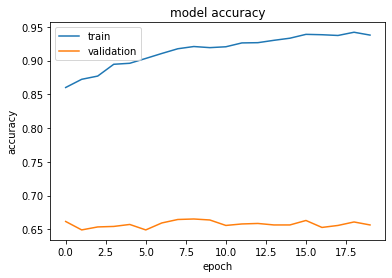

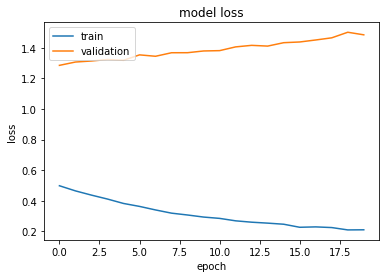

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
# Analyze Classification Summary
y_proba = model_wv_1000.predict([X_test])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_test, y_pred, y_proba)

Model accuracy: 58.41%
________________________________________________________________________________
Confusion matrix:
 [[743   0   1 ...   1   0   3]
 [  3   0   0 ...   1   0   0]
 [ 14   0  11 ...   0   0   0]
 ...
 [ 47   0   1 ...  72   0   0]
 [ 47   0   0 ...   0   2   1]
 [ 44   2   2 ...   3   0   6]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82       795
           1       0.00      0.00      0.00         6
           2       0.52      0.39      0.45        28
           3       0.00      0.00      0.00         6
           4       0.61      0.53      0.57        51
           5       0.50      0.28      0.36        29
           6       0.56      0.21      0.30        24
           7       0.67      0.25      0.36         8
           8       0.57      0.24      0.33        17
           9       0.93      0.88      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



Observations: It is seen that trying to balance improves the accuracy on measures like overall accuracy, F1 Macro and weighted average

Next Steps: Thus it is observed that it would be beneficial to try and re-sample the data to take care of large imbalance in the assignment groups 

# Upsampling & Downsampling

In [8]:
Samp_df = new_df[{'Clean Description','Assignment group'}]

In [9]:
cols = ['Assignment group']
for col in cols:
    val = new_df[col].value_counts()
    y = val[val < 30].index # all groups with less than 30 records will be combined into others
    Samp_df[col] = Samp_df[col].replace({x:'GRP_99' for x in y})

In [10]:
count = Samp_df['Assignment group'].value_counts() 
print(count)

GRP_0     3976
GRP_8      661
GRP_99     357
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_15      39
GRP_30      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_1       31
GRP_22      31
GRP_11      30
Name: Assignment group, dtype: int64


We want to downsample Group 0 to about 2000 cases and upsample all groups that have a sample less than 200 to 200 (i.e. at least 10% of the Group with the largest sample). Other groups that have a sample>150 will be left as is 

In [11]:
df_GRP0 = Samp_df[Samp_df['Assignment group'] =='GRP_0']
df_GRP0.describe().transpose()

,count,unique,top,freq
Assignment group,3976,1,GRP_0,3976
Clean Description,3976,3104,ticket update inplant,82


In [12]:
from sklearn.utils import resample
df_GRP0_downsampled = resample(df_GRP0, 
                                 replace=False,    # sample without replacement
                                 n_samples=2000,     # to match minority class
                                 random_state=123) # reproducible results

In [13]:
groups = ['GRP_8' , 'GRP_99' , 'GRP_24' , 'GRP_12' , 'GRP_9' , 'GRP_2' , 'GRP_19' , 'GRP_3']

In [14]:
df_retain_group= Samp_df[Samp_df['Assignment group'].isin(groups)]

In [15]:
df_retain_group.describe().transpose()

,count,unique,top,freq
Assignment group,2472,8,GRP_8,661
Clean Description,2472,1841,job fail scheduler from,335


In [16]:
df_GRP6 = Samp_df[Samp_df['Assignment group'] =='GRP_6']
df_GRP6.describe().transpose()
df_GRP6_upsampled = resample(df_GRP6, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [17]:
df_GRP13 = Samp_df[Samp_df['Assignment group'] =='GRP_13']
df_GRP13.describe().transpose()
df_GRP13_upsampled = resample(df_GRP13, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [18]:
df_GRP10 = Samp_df[Samp_df['Assignment group'] =='GRP_10']
df_GRP10.describe().transpose()
df_GRP10_upsampled = resample(df_GRP10, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [19]:
df_GRP5 = Samp_df[Samp_df['Assignment group'] =='GRP_5']
df_GRP5.describe().transpose()
df_GRP5_upsampled = resample(df_GRP5, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [20]:
df_GRP14 = Samp_df[Samp_df['Assignment group'] =='GRP_14']
df_GRP14.describe().transpose()
df_GRP14_upsampled = resample(df_GRP14, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [21]:
df_GRP25 = Samp_df[Samp_df['Assignment group'] =='GRP_25']
df_GRP25.describe().transpose()
df_GRP25_upsampled = resample(df_GRP25, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [22]:
df_GRP33 = Samp_df[Samp_df['Assignment group'] =='GRP_33']
df_GRP33.describe().transpose()
df_GRP33_upsampled = resample(df_GRP33, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [23]:
df_GRP4 = Samp_df[Samp_df['Assignment group'] =='GRP_4']
df_GRP4.describe().transpose()
df_GRP4_upsampled = resample(df_GRP4, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [24]:
df_GRP29 = Samp_df[Samp_df['Assignment group'] =='GRP_29']
df_GRP29.describe().transpose()
df_GRP29_upsampled = resample(df_GRP29, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [25]:
df_GRP18 = Samp_df[Samp_df['Assignment group'] =='GRP_18']
df_GRP18.describe().transpose()

,count,unique,top,freq
Assignment group,88,1,GRP_18,88
Clean Description,88,85,job fail scheduler from,3


In [26]:
df_GRP18_upsampled = resample(df_GRP18, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [27]:
df_GRP18_upsampled.describe().transpose()

,count,unique,top,freq
Assignment group,200,1,GRP_18,200
Clean Description,200,77,the not generate dn dear would pls check this,7


In [28]:
df_GRP16 = Samp_df[Samp_df['Assignment group'] =='GRP_16']
df_GRP16.describe().transpose()
df_GRP16_upsampled = resample(df_GRP16, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [29]:
df_GRP17 = Samp_df[Samp_df['Assignment group'] =='GRP_17']
df_GRP17.describe().transpose()
df_GRP17_upsampled = resample(df_GRP17, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [30]:
df_GRP31 = Samp_df[Samp_df['Assignment group'] =='GRP_31']
df_GRP31.describe().transpose()
df_GRP31_upsampled = resample(df_GRP31, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [31]:
df_GRP7 = Samp_df[Samp_df['Assignment group'] =='GRP_7']
df_GRP7.describe().transpose()
df_GRP7_upsampled = resample(df_GRP7, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [32]:
df_GRP34 = Samp_df[Samp_df['Assignment group'] =='GRP_34']
df_GRP34.describe().transpose()
df_GRP34_upsampled = resample(df_GRP34, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [33]:
df_GRP26 = Samp_df[Samp_df['Assignment group'] =='GRP_26']
df_GRP26.describe().transpose()
df_GRP26_upsampled = resample(df_GRP26, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [34]:
df_GRP40 = Samp_df[Samp_df['Assignment group'] =='GRP_40']
df_GRP40.describe().transpose()
df_GRP40_upsampled = resample(df_GRP40, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [35]:
df_GRP28 = Samp_df[Samp_df['Assignment group'] =='GRP_28']
df_GRP28.describe().transpose()
df_GRP28_upsampled = resample(df_GRP28, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [36]:
df_GRP41 = Samp_df[Samp_df['Assignment group'] =='GRP_41']
df_GRP41.describe().transpose()
df_GRP41_upsampled = resample(df_GRP41, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [37]:
df_GRP15 = Samp_df[Samp_df['Assignment group'] =='GRP_15']
df_GRP15.describe().transpose()
df_GRP15_upsampled = resample(df_GRP15, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [38]:
df_GRP30 = Samp_df[Samp_df['Assignment group'] =='GRP_30']
df_GRP30.describe().transpose()
df_GRP30_upsampled = resample(df_GRP30, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [39]:
df_GRP42 = Samp_df[Samp_df['Assignment group'] =='GRP_42']
df_GRP42.describe().transpose()
df_GRP42_upsampled = resample(df_GRP42, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [40]:
df_GRP20 = Samp_df[Samp_df['Assignment group'] =='GRP_20']
df_GRP20.describe().transpose()
df_GRP20_upsampled = resample(df_GRP20, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [41]:
df_GRP45 = Samp_df[Samp_df['Assignment group'] =='GRP_45']
df_GRP45.describe().transpose()
df_GRP45_upsampled = resample(df_GRP45, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [42]:
df_GRP22 = Samp_df[Samp_df['Assignment group'] =='GRP_22']
df_GRP22.describe().transpose()
df_GRP22_upsampled = resample(df_GRP22, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [43]:
df_GRP1 = Samp_df[Samp_df['Assignment group'] =='GRP_1']
df_GRP1.describe().transpose()
df_GRP1_upsampled = resample(df_GRP1, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [44]:
df_GRP11 = Samp_df[Samp_df['Assignment group'] =='GRP_11']
df_GRP11.describe().transpose()
df_GRP11_upsampled = resample(df_GRP11, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results

In [45]:
df_sampled = pd.concat([df_GRP0_downsampled, df_retain_group, df_GRP6_upsampled, df_GRP13_upsampled, df_GRP10_upsampled, df_GRP5_upsampled,   
                        df_GRP14_upsampled, df_GRP25_upsampled, df_GRP33_upsampled, df_GRP4_upsampled, df_GRP29_upsampled,
                        df_GRP18_upsampled, df_GRP16_upsampled, df_GRP17_upsampled, 
                          df_GRP31_upsampled, df_GRP7_upsampled, df_GRP34_upsampled, df_GRP26_upsampled, df_GRP40_upsampled,
                          df_GRP28_upsampled, df_GRP41_upsampled, df_GRP15_upsampled, df_GRP30_upsampled, df_GRP42_upsampled, 
                          df_GRP20_upsampled, df_GRP45_upsampled, df_GRP22_upsampled, df_GRP1_upsampled, df_GRP11_upsampled])

In [46]:
df_sampled.describe().transpose()

,count,unique,top,freq
Assignment group,9872,36,GRP_0,2000
Clean Description,9872,4946,job fail scheduler from,508


In [49]:
df_sampled.to_csv('df_sampled.csv')

In [47]:
# First to Create a target categorical column
df_sampled['Assignment group'] = df_sampled['Assignment group'].astype('category').cat.codes
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9872 entries, 1822 to 4958
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Assignment group   9872 non-null   int8  
 1   Clean Description  9872 non-null   object
dtypes: int8(1), object(1)
memory usage: 163.9+ KB


# Modeling with Re-sampled database

In [48]:
max_features = 10000
maxlen = 100
#embedding_size = 1000

In [49]:
tokenizer = Tokenizer(num_words=max_features)

In [50]:
tokenizer.fit_on_texts(df_sampled['Clean Description'])

In [51]:
X = tokenizer.texts_to_sequences(df_sampled['Clean Description'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df_sampled['Assignment group'])

print("Number of Samples:", len(X))
print(X[367])
print("Number of Labels: ", len(y))
print(y[367])

Number of Samples: 9872
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    5   12   54  386 1786    4   83   19   54  307  248
   41 1787]
Number of Labels:  9872
0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [53]:
# Load the Word2Vec model
wmodel = Doc2Vec.load('w2v_1000.mdl')

In [54]:
w2v_weights = wmodel.wv.vectors
vocab_size, embedding_size = w2v_weights.shape
print("Vocabulary Size: {} - Embedding Dim: {}".format(vocab_size, embedding_size))

Vocabulary Size: 7518 - Embedding Dim: 1000


In [140]:
# CREATE the MODEL

model_wv_1000 = Sequential()
model_wv_1000.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=maxlen, 
                        mask_zero=True,
                        trainable=False))
model_wv_1000.add(SpatialDropout1D(0.2))
model_wv_1000.add(Bidirectional(LSTM(128)))
model_wv_1000.add(Dropout(0.2))
model_wv_1000.add(Dense(units=36, activation='softmax'))
model_wv_1000.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_wv_1000.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 1000)         7518000   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 100, 1000)         0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)               1156096   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 36)                9252      
Total params: 8,683,348
Trainable params: 1,165,348
Non-trainable params: 7,518,000
_________________________________________________________________
None


In [55]:
# Code for getting Class weight
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced' ,np.unique(y_train) ,y_train)

In [56]:
# Converting to categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [143]:
batch_size = 1000
epochs = 20
history = model_wv_1000.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1,validation_split=0.2)

Train on 6317 samples, validate on 1580 samples
Epoch 1/20
6317/6317 [==============================] - 10s 2ms/step - loss: 3.1679 - accuracy: 0.2128 - val_loss: 2.7350 - val_accuracy: 0.2861
Epoch 2/20
6317/6317 [==============================] - 20s 3ms/step - loss: 2.5739 - accuracy: 0.3177 - val_loss: 2.3658 - val_accuracy: 0.3437
Epoch 3/20
6317/6317 [==============================] - 46s 7ms/step - loss: 2.1774 - accuracy: 0.4266 - val_loss: 2.0455 - val_accuracy: 0.4785
Epoch 4/20
6317/6317 [==============================] - 47s 8ms/step - loss: 1.8303 - accuracy: 0.5382 - val_loss: 1.7783 - val_accuracy: 0.5348
Epoch 5/20
6317/6317 [==============================] - 48s 8ms/step - loss: 1.5421 - accuracy: 0.5989 - val_loss: 1.5773 - val_accuracy: 0.5684
Epoch 6/20
6317/6317 [==============================] - 48s 8ms/step - loss: 1.3333 - accuracy: 0.6445 - val_loss: 1.4117 - val_accuracy: 0.6057
Epoch 7/20
6317/6317 [==============================] - 47s 8ms/step - loss: 1.158

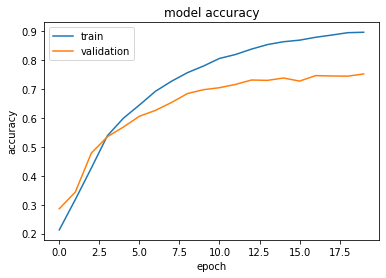

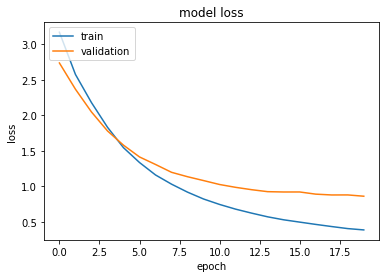

In [144]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [145]:
# Analyze Classification Summary
y_proba = model_wv_1000.predict([X_test])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_test, y_pred, y_proba)

Model accuracy: 67.80%
________________________________________________________________________________
Confusion matrix:
 [[363   0   0 ...   0   0   3]
 [  3  37   0 ...   0   0   0]
 [ 15   0  22 ...   0   0   2]
 ...
 [ 47   3   2 ...  75   0   2]
 [ 47   0   0 ...   0   1   0]
 [ 52   0   0 ...   4   0   3]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       400
           1       0.77      0.93      0.84        40
           2       0.92      0.55      0.69        40
           3       1.00      1.00      1.00        40
           4       0.74      0.56      0.64        52
           5       0.78      0.70      0.74        40
           6       0.96      0.68      0.79        40
           7       1.00      0.97      0.99        40
           8       0.91      0.75      0.82        40
           9       1.00      1.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



Observations: Good improvement seen in all measures of accuracy

# Applying Class weight

In [146]:
batch_size = 1000
epochs = 20
history = model_wv_1000.fit(X_train, y_train, epochs=epochs, class_weight=class_weight, batch_size=batch_size, verbose=1,validation_split=0.2)

Train on 6317 samples, validate on 1580 samples
Epoch 1/20
6317/6317 [==============================] - 34s 5ms/step - loss: 0.3576 - accuracy: 0.9077 - val_loss: 0.8406 - val_accuracy: 0.7627
Epoch 2/20
6317/6317 [==============================] - 48s 8ms/step - loss: 0.3425 - accuracy: 0.9095 - val_loss: 0.8624 - val_accuracy: 0.7646
Epoch 3/20
6317/6317 [==============================] - 48s 8ms/step - loss: 0.3224 - accuracy: 0.9148 - val_loss: 0.8499 - val_accuracy: 0.7595
Epoch 4/20
6317/6317 [==============================] - 48s 8ms/step - loss: 0.3148 - accuracy: 0.9166 - val_loss: 0.8455 - val_accuracy: 0.7671
Epoch 5/20
6317/6317 [==============================] - 48s 8ms/step - loss: 0.3021 - accuracy: 0.9174 - val_loss: 0.8583 - val_accuracy: 0.7633
Epoch 6/20
6317/6317 [==============================] - 48s 8ms/step - loss: 0.2801 - accuracy: 0.9272 - val_loss: 0.8616 - val_accuracy: 0.7576
Epoch 7/20
6317/6317 [==============================] - 48s 8ms/step - loss: 0.276

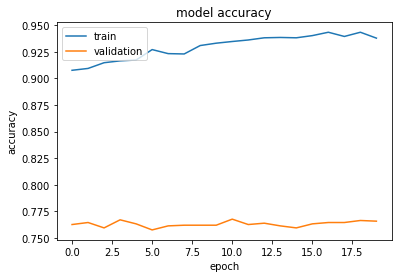

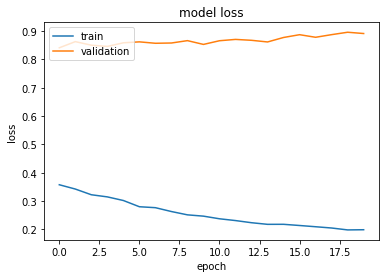

In [147]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [148]:
# Analyze Classification Summary
y_proba = model_wv_1000.predict([X_test])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_test, y_pred, y_proba)

Model accuracy: 71.14%
________________________________________________________________________________
Confusion matrix:
 [[345   0   0 ...   0   2   8]
 [  5  33   0 ...   2   0   0]
 [ 11   0  26 ...   0   0   1]
 ...
 [ 45   1   2 ...  76   0   2]
 [ 41   0   0 ...   0   6   1]
 [ 43   0   0 ...   6   0   5]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       400
           1       0.97      0.82      0.89        40
           2       0.93      0.65      0.76        40
           3       1.00      1.00      1.00        40
           4       0.73      0.62      0.67        52
           5       0.72      0.72      0.73        40
           6       0.91      0.75      0.82        40
           7       1.00      0.97      0.99        40
           8       0.83      0.75      0.79        40
           9       1.00      1.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



Observations: Again improvement seen in accuracy measures

# Fine Tuning

We have tried fune tuning using the following measures
- Adding Attention Layer
- Adding additional layer of Bidirectional LSTM
- Changing the drop out rate
- Optimizing Adam
- Adding batch normalization

# Adding attention layer

In [57]:
# CREATE the MODEL

model_wv_1000 = Sequential()
model_wv_1000.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=maxlen, 
                        mask_zero=False,
                        trainable=False))
model_wv_1000.add(SpatialDropout1D(0.2))
model_wv_1000.add(Bidirectional(LSTM(128, return_sequences=True)))
model_wv_1000.add(SeqSelfAttention(attention_activation='softmax')) # added attention layer
model_wv_1000.add(Dropout(0.2))
model_wv_1000.add(Flatten())
model_wv_1000.add(Dense(units=36, activation='softmax'))
model_wv_1000.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_wv_1000.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 1000)         7518000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 1000)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 256)          1156096   
_________________________________________________________________
seq_self_attention_1 (SeqSel (None, 100, 256)          16449     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 256)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 36)               

In [58]:
batch_size = 500
epochs = 30
history = model_wv_1000.fit(X_train, y_train, epochs=epochs, class_weight=class_weight, batch_size=batch_size, verbose=1,validation_split=0.2)


Train on 6317 samples, validate on 1580 samples
Epoch 1/30
6317/6317 [==============================] - 19s 3ms/step - loss: 3.6728 - accuracy: 0.1482 - val_loss: 3.2558 - val_accuracy: 0.2241
Epoch 2/30
6317/6317 [==============================] - 43s 7ms/step - loss: 3.1795 - accuracy: 0.2167 - val_loss: 3.0482 - val_accuracy: 0.2342
Epoch 3/30
6317/6317 [==============================] - 79s 12ms/step - loss: 2.8890 - accuracy: 0.2652 - val_loss: 2.6262 - val_accuracy: 0.3171
Epoch 4/30
6317/6317 [==============================] - 79s 12ms/step - loss: 2.3893 - accuracy: 0.3551 - val_loss: 2.1543 - val_accuracy: 0.3924
Epoch 5/30
6317/6317 [==============================] - 79s 13ms/step - loss: 1.9307 - accuracy: 0.4494 - val_loss: 1.8445 - val_accuracy: 0.4835
Epoch 6/30
6317/6317 [==============================] - 79s 13ms/step - loss: 1.6590 - accuracy: 0.5249 - val_loss: 1.6591 - val_accuracy: 0.5538
Epoch 7/30
6317/6317 [==============================] - 79s 13ms/step - loss:

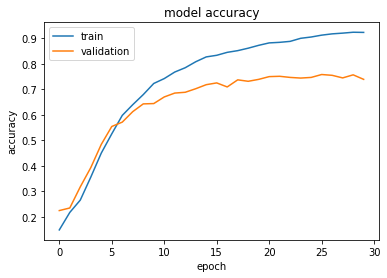

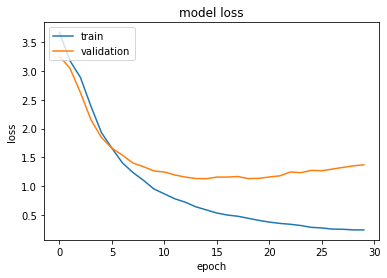

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [62]:
# Analyze Classification Summary
y_proba = model_wv_1000.predict([X_test])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_test, y_pred, y_proba)

Model accuracy: 70.28%
________________________________________________________________________________
Confusion matrix:
 [[295   0   0 ...   0   0  20]
 [  0  35   0 ...   0   0   0]
 [  9   0  24 ...   0   0   2]
 ...
 [ 42   1   2 ...  70   0   4]
 [ 33   0   0 ...   0   9   4]
 [ 25   0   0 ...   2   0  13]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.66      0.73       400
           1       0.95      0.88      0.91        40
           2       0.89      0.60      0.72        40
           3       0.93      1.00      0.96        40
           4       0.64      0.44      0.52        52
           5       0.61      0.78      0.68        40
           6       0.83      0.72      0.77        40
           7       0.91      1.00      0.95        40
           8       0.89      0.78      0.83        40
           9       1.00      1.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



No Major improvment seen by adding Attention Layer

# Adding one more layer of Bi-directional LSTM

In [63]:
# Adding one more layer of bidirectional LSTM


model_wv_1000 = Sequential()
model_wv_1000.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=maxlen, 
                        mask_zero=True,
                        trainable=False))
model_wv_1000.add(SpatialDropout1D(0.2))
model_wv_1000.add(Bidirectional(LSTM(128, return_sequences=True)))
model_wv_1000.add(Bidirectional(LSTM(64))) # added additional layer
model_wv_1000.add(Dropout(0.2))
model_wv_1000.add(Dense(units=36, activation='softmax'))
model_wv_1000.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_wv_1000.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 1000)         7518000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 100, 1000)         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 256)          1156096   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               164352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 36)                4644      
Total params: 8,843,092
Tr

In [64]:
batch_size = 500
epochs = 30
history = model_wv_1000.fit(X_train, y_train, epochs=epochs, class_weight=class_weight, batch_size=batch_size, verbose=1,validation_split=0.2)

Train on 6317 samples, validate on 1580 samples
Epoch 1/30
6317/6317 [==============================] - 64s 10ms/step - loss: 3.1018 - accuracy: 0.2485 - val_loss: 2.6614 - val_accuracy: 0.2892
Epoch 2/30
6317/6317 [==============================] - 71s 11ms/step - loss: 2.3745 - accuracy: 0.3706 - val_loss: 2.1143 - val_accuracy: 0.4373
Epoch 3/30
6317/6317 [==============================] - 71s 11ms/step - loss: 1.8307 - accuracy: 0.5238 - val_loss: 1.7314 - val_accuracy: 0.5411
Epoch 4/30
6317/6317 [==============================] - 71s 11ms/step - loss: 1.4721 - accuracy: 0.6076 - val_loss: 1.4986 - val_accuracy: 0.5949
Epoch 5/30
6317/6317 [==============================] - 71s 11ms/step - loss: 1.2466 - accuracy: 0.6630 - val_loss: 1.3419 - val_accuracy: 0.6304
Epoch 6/30
6317/6317 [==============================] - 71s 11ms/step - loss: 1.0502 - accuracy: 0.7146 - val_loss: 1.2222 - val_accuracy: 0.6525
Epoch 7/30
6317/6317 [==============================] - 71s 11ms/step - loss

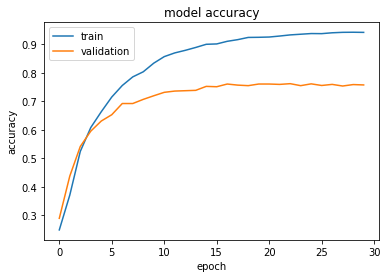

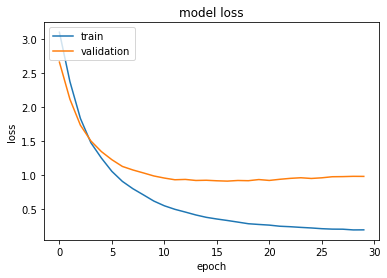

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [155]:
# Analyze Classification Summary
y_proba = model_wv_1000.predict([X_test])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_test, y_pred, y_proba)

Model accuracy: 71.44%
________________________________________________________________________________
Confusion matrix:
 [[347   0   1 ...   0   1  12]
 [  2  37   0 ...   1   0   0]
 [ 11   0  27 ...   1   0   0]
 ...
 [ 44   2   2 ...  78   0   2]
 [ 37   0   0 ...   0   6   6]
 [ 34   0   2 ...   4   1  16]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       400
           1       0.80      0.93      0.86        40
           2       0.73      0.68      0.70        40
           3       1.00      1.00      1.00        40
           4       0.65      0.58      0.61        52
           5       0.76      0.70      0.73        40
           6       0.91      0.75      0.82        40
           7       0.98      1.00      0.99        40
           8       0.94      0.78      0.85        40
           9       1.00      1.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



Observations: No real change in accuracies

# Changing Drop out rate

In [66]:
# Changing the drop out rate


model_wv_1000 = Sequential()
model_wv_1000.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=maxlen, 
                        mask_zero=True,
                        trainable=False))
model_wv_1000.add(SpatialDropout1D(0.1)) # changed the drop out rate
model_wv_1000.add(Bidirectional(LSTM(128)))
model_wv_1000.add(Dropout(0.1)) # changed the drop out rate
model_wv_1000.add(Dense(units=36, activation='softmax'))
model_wv_1000.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_wv_1000.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 1000)         7518000   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 100, 1000)         0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)               1156096   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 36)                9252      
Total params: 8,683,348
Trainable params: 1,165,348
Non-trainable params: 7,518,000
_________________________________________________________________
None


In [67]:
batch_size = 500
epochs = 30
history = model_wv_1000.fit(X_train, y_train, epochs=epochs, class_weight=class_weight, batch_size=batch_size, verbose=1,validation_split=0.2)

Train on 6317 samples, validate on 1580 samples
Epoch 1/30
6317/6317 [==============================] - 42s 7ms/step - loss: 2.9146 - accuracy: 0.2610 - val_loss: 2.4376 - val_accuracy: 0.3215
Epoch 2/30
6317/6317 [==============================] - 50s 8ms/step - loss: 2.0995 - accuracy: 0.4518 - val_loss: 1.8832 - val_accuracy: 0.4937
Epoch 3/30
6317/6317 [==============================] - 51s 8ms/step - loss: 1.5479 - accuracy: 0.6004 - val_loss: 1.5262 - val_accuracy: 0.5741
Epoch 4/30
6317/6317 [==============================] - 51s 8ms/step - loss: 1.2004 - accuracy: 0.6813 - val_loss: 1.3002 - val_accuracy: 0.6342
Epoch 5/30
6317/6317 [==============================] - 51s 8ms/step - loss: 0.9508 - accuracy: 0.7456 - val_loss: 1.1439 - val_accuracy: 0.6772
Epoch 6/30
6317/6317 [==============================] - 51s 8ms/step - loss: 0.7815 - accuracy: 0.7937 - val_loss: 1.0384 - val_accuracy: 0.7032
Epoch 7/30
6317/6317 [==============================] - 51s 8ms/step - loss: 0.656

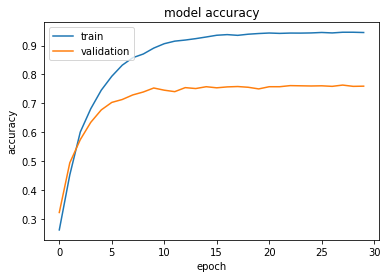

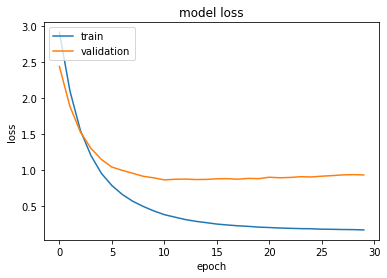

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [158]:
# Analyze Classification Summary
y_proba = model_wv_1000.predict([X_test])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_test, y_pred, y_proba)

Model accuracy: 71.49%
________________________________________________________________________________
Confusion matrix:
 [[356   0   0 ...   0   0   7]
 [  1  37   0 ...   2   0   0]
 [ 12   0  25 ...   0   0   0]
 ...
 [ 42   3   2 ...  73   0   2]
 [ 39   0   0 ...   0   5   1]
 [ 43   0   0 ...   4   0  11]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       400
           1       0.77      0.93      0.84        40
           2       0.89      0.62      0.74        40
           3       0.95      1.00      0.98        40
           4       0.68      0.65      0.67        52
           5       0.76      0.70      0.73        40
           6       0.91      0.75      0.82        40
           7       1.00      0.97      0.99        40
           8       0.94      0.78      0.85        40
           9       1.00      1.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



Observations: No real change observed

# Optimizing Adam

In [69]:
# Optimizing Adam

from keras.optimizers import Adam

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)


model_wv_1000 = Sequential()
model_wv_1000.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=maxlen, 
                        mask_zero=True,
                        trainable=False))
model_wv_1000.add(SpatialDropout1D(0.2))
model_wv_1000.add(Bidirectional(LSTM(128)))
model_wv_1000.add(Dropout(0.25))
model_wv_1000.add(Dense(units=36, activation='softmax'))
model_wv_1000.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_wv_1000.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 1000)         7518000   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 100, 1000)         0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               1156096   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 36)                9252      
Total params: 8,683,348
Trainable params: 1,165,348
Non-trainable params: 7,518,000
_________________________________________________________________
None


In [70]:
batch_size = 500
epochs = 30
history = model_wv_1000.fit(X_train, y_train, epochs=epochs, class_weight=class_weight, batch_size=batch_size, verbose=1,validation_split=0.2)

Train on 6317 samples, validate on 1580 samples
Epoch 1/30
6317/6317 [==============================] - 26s 4ms/step - loss: 2.9545 - accuracy: 0.2531 - val_loss: 2.4892 - val_accuracy: 0.3291
Epoch 2/30
6317/6317 [==============================] - 51s 8ms/step - loss: 2.2183 - accuracy: 0.4168 - val_loss: 1.9708 - val_accuracy: 0.4810
Epoch 3/30
6317/6317 [==============================] - 51s 8ms/step - loss: 1.7081 - accuracy: 0.5590 - val_loss: 1.6165 - val_accuracy: 0.5646
Epoch 4/30
6317/6317 [==============================] - 51s 8ms/step - loss: 1.3678 - accuracy: 0.6308 - val_loss: 1.4011 - val_accuracy: 0.6177
Epoch 5/30
6317/6317 [==============================] - 51s 8ms/step - loss: 1.1330 - accuracy: 0.6899 - val_loss: 1.2416 - val_accuracy: 0.6544
Epoch 6/30
6317/6317 [==============================] - 51s 8ms/step - loss: 0.9493 - accuracy: 0.7445 - val_loss: 1.1367 - val_accuracy: 0.6829
Epoch 7/30
6317/6317 [==============================] - 51s 8ms/step - loss: 0.827

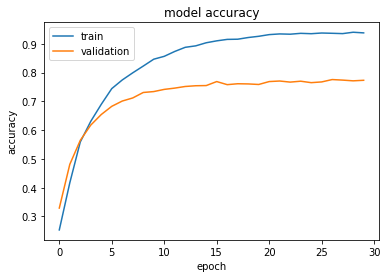

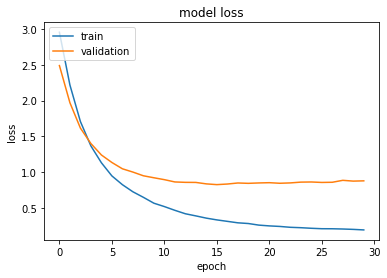

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [161]:
# Analyze Classification Summary
y_proba = model_wv_1000.predict([X_test])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_test, y_pred, y_proba)

Model accuracy: 71.85%
________________________________________________________________________________
Confusion matrix:
 [[350   0   2 ...   0   0   9]
 [  3  37   0 ...   0   0   0]
 [ 12   0  25 ...   0   0   1]
 ...
 [ 44   3   2 ...  70   0   2]
 [ 42   0   0 ...   0   5   1]
 [ 44   0   0 ...   4   0  13]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       400
           1       0.79      0.93      0.85        40
           2       0.86      0.62      0.72        40
           3       1.00      1.00      1.00        40
           4       0.67      0.62      0.64        52
           5       0.71      0.72      0.72        40
           6       0.77      0.75      0.76        40
           7       1.00      1.00      1.00        40
           8       0.89      0.80      0.84        40
           9       1.00      1.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



Observations: Marginal Improvement seen and hence going forward will keep the Adam Optimization

In [72]:
# Adding batch Normalization

from keras.optimizers import Adam

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)


model_wv_1000 = Sequential()
model_wv_1000.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=maxlen, 
                        mask_zero=True,
                        trainable=False))
model_wv_1000.add(SpatialDropout1D(0.2))
model_wv_1000.add(Bidirectional(LSTM(128)))
model_wv_1000.add(BatchNormalization(momentum=0.9,epsilon=0.02)) # added batch normalization
model_wv_1000.add(Dropout(0.2))
model_wv_1000.add(Dense(units=36, activation='softmax'))
model_wv_1000.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_wv_1000.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 1000)         7518000   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 100, 1000)         0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 256)               1156096   
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 36)                9252      
Total params: 8,684,372
Trainable params: 1,165,860
Non-trainable params: 7,518,512
____________________________________

In [73]:
batch_size = 500
epochs = 30
history = model_wv_1000.fit(X_train, y_train, epochs=epochs, class_weight=class_weight, batch_size=batch_size, verbose=1,validation_split=0.2)

Train on 6317 samples, validate on 1580 samples
Epoch 1/30
6317/6317 [==============================] - 16s 2ms/step - loss: 2.7998 - accuracy: 0.3019 - val_loss: 2.4304 - val_accuracy: 0.4892
Epoch 2/30
6317/6317 [==============================] - 44s 7ms/step - loss: 1.6507 - accuracy: 0.5669 - val_loss: 1.6914 - val_accuracy: 0.5930
Epoch 3/30
6317/6317 [==============================] - 51s 8ms/step - loss: 1.2423 - accuracy: 0.6680 - val_loss: 1.3130 - val_accuracy: 0.6570
Epoch 4/30
6317/6317 [==============================] - 51s 8ms/step - loss: 0.9946 - accuracy: 0.7341 - val_loss: 1.1808 - val_accuracy: 0.6785
Epoch 5/30
6317/6317 [==============================] - 51s 8ms/step - loss: 0.8239 - accuracy: 0.7820 - val_loss: 1.0926 - val_accuracy: 0.7184
Epoch 6/30
6317/6317 [==============================] - 51s 8ms/step - loss: 0.6983 - accuracy: 0.8164 - val_loss: 1.0409 - val_accuracy: 0.7291
Epoch 7/30
6317/6317 [==============================] - 51s 8ms/step - loss: 0.600

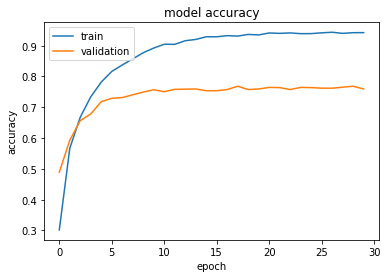

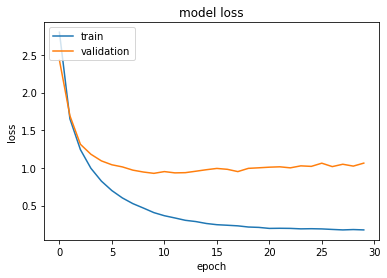

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [164]:
# Analyze Classification Summary
y_proba = model_wv_1000.predict([X_test])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_test, y_pred, y_proba)

Model accuracy: 72.10%
________________________________________________________________________________
Confusion matrix:
 [[336   0   1 ...   2   0  10]
 [  3  37   0 ...   0   0   0]
 [ 11   0  27 ...   0   0   1]
 ...
 [ 42   3   2 ...  73   0   2]
 [ 37   0   0 ...   0   6   2]
 [ 39   0   2 ...   3   0   9]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77       400
           1       0.79      0.93      0.85        40
           2       0.82      0.68      0.74        40
           3       1.00      1.00      1.00        40
           4       0.68      0.58      0.62        52
           5       0.81      0.75      0.78        40
           6       0.74      0.80      0.77        40
           7       1.00      0.97      0.99        40
           8       0.89      0.82      0.86        40
           9       1.00      1.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



Observations: No Change observed in accuracy

# Trying Glove on the balanced dataset

In [75]:
max_features = 10000
maxlen = 100
embedding_size = 200

In [76]:
tokenizer = Tokenizer(num_words=max_features,filters= '!"#$%&()*+,-./:;<=>?@[\]^_`{|}\n“~”')

In [77]:
tokenizer.fit_on_texts(df_sampled['Clean Description'])

In [78]:
# First to Create a target categorical column
df_sampled['Assignment group'] = df_sampled['Assignment group'].astype('category').cat.codes
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9872 entries, 1822 to 4958
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Assignment group   9872 non-null   int8  
 1   Clean Description  9872 non-null   object
dtypes: int8(1), object(1)
memory usage: 163.9+ KB


In [79]:
X = tokenizer.texts_to_sequences(df_sampled['Clean Description'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df_sampled['Assignment group'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 9872
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  5 12 13 22]
Number of Labels:  9872
0


In [80]:
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d\nDocuments count: %d' % (vocab_size, tokenizer.document_count))

Vocabulary size: 9180
Documents count: 9872


In [81]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.200d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 200))


for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        

Loaded 400000 word vectors.


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [83]:
# Build the model
embedding_dim = 200

model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,
                    trainable=True))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(CuDNNLSTM(128)))
model.add(Dropout(0.25))
model.add(Dense(units=36, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 200)          1836000   
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 100, 200)          0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 256)               337920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 36)                9252      
Total params: 2,183,172
Trainable params: 2,183,172
Non-trainable params: 0
_________________________________________________________________
None


In [84]:
# Code for getting Class weight
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced' ,np.unique(y_train) ,y_train)

In [85]:
# Converting to categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [86]:
batch_size = 500
epochs = 30
history = model.fit(X_train, y_train, epochs=epochs, class_weight=class_weight, batch_size=batch_size, verbose=1, validation_split=0.2)

Train on 6317 samples, validate on 1580 samples
Epoch 1/30
6317/6317 [==============================] - 6s 872us/step - loss: 3.3864 - accuracy: 0.1718 - val_loss: 3.1896 - val_accuracy: 0.2335
Epoch 2/30
6317/6317 [==============================] - 4s 688us/step - loss: 3.0885 - accuracy: 0.2523 - val_loss: 2.9185 - val_accuracy: 0.2658
Epoch 3/30
6317/6317 [==============================] - 11s 2ms/step - loss: 2.7867 - accuracy: 0.2815 - val_loss: 2.6235 - val_accuracy: 0.3095
Epoch 4/30
6317/6317 [==============================] - 18s 3ms/step - loss: 2.4914 - accuracy: 0.3240 - val_loss: 2.3651 - val_accuracy: 0.3690
Epoch 5/30
6317/6317 [==============================] - 18s 3ms/step - loss: 2.2122 - accuracy: 0.3978 - val_loss: 2.0992 - val_accuracy: 0.4291
Epoch 6/30
6317/6317 [==============================] - 18s 3ms/step - loss: 1.9427 - accuracy: 0.4710 - val_loss: 1.8830 - val_accuracy: 0.5032
Epoch 7/30
6317/6317 [==============================] - 18s 3ms/step - loss: 1.7

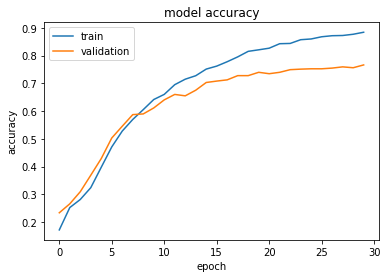

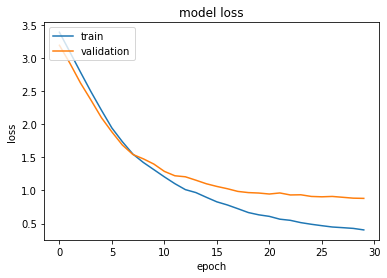

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [189]:
# Analyze Classification Summary
y_proba = model.predict([X_test])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_test, y_pred, y_proba)

Model accuracy: 71.04%
________________________________________________________________________________
Confusion matrix:
 [[349   0   2 ...   1   0   7]
 [  2  38   0 ...   0   0   0]
 [ 14   0  24 ...   0   0   2]
 ...
 [ 44   2   2 ...  72   0   3]
 [ 42   0   0 ...   0   6   1]
 [ 42   0   0 ...   3   0  11]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       400
           1       0.81      0.95      0.87        40
           2       0.83      0.60      0.70        40
           3       0.98      1.00      0.99        40
           4       0.81      0.58      0.67        52
           5       0.84      0.68      0.75        40
           6       0.80      0.70      0.75        40
           7       1.00      0.97      0.99        40
           8       0.79      0.85      0.82        40
           9       1.00      1.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



Observations: Accuracies as good as on the n-gram Word2Vec modeling

# Adding Adam Optimization and Batch Normalization

In [88]:
# Optimizing Adam and adding Batch Normalization
from keras.optimizers import Adam

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)

embedding_dim = 200

model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,
                    trainable=True))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(CuDNNLSTM(128)))
model.add(BatchNormalization(momentum=0.9,epsilon=0.02)) # added batch normalization
model.add(Dropout(0.25))
model.add(Dense(units=36, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 200)          1836000   
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 100, 200)          0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 256)               337920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 36)                9252      
Total params: 2,184,196
Trainable params: 2,183,684
Non-trainable params: 512
__________________________________________

In [89]:
batch_size = 500
epochs = 30
history = model.fit(X_train, y_train, epochs=epochs, class_weight=class_weight, batch_size=batch_size, verbose=1, validation_split=0.2)

Train on 6317 samples, validate on 1580 samples
Epoch 1/30
6317/6317 [==============================] - 4s 609us/step - loss: 3.2925 - accuracy: 0.1659 - val_loss: 3.2541 - val_accuracy: 0.2506
Epoch 2/30
6317/6317 [==============================] - 4s 571us/step - loss: 2.6845 - accuracy: 0.3043 - val_loss: 2.5886 - val_accuracy: 0.3557
Epoch 3/30
6317/6317 [==============================] - 6s 975us/step - loss: 2.2991 - accuracy: 0.3983 - val_loss: 2.1605 - val_accuracy: 0.4456
Epoch 4/30
6317/6317 [==============================] - 14s 2ms/step - loss: 1.9853 - accuracy: 0.4724 - val_loss: 1.8514 - val_accuracy: 0.4987
Epoch 5/30
6317/6317 [==============================] - 18s 3ms/step - loss: 1.6920 - accuracy: 0.5523 - val_loss: 1.6996 - val_accuracy: 0.5519
Epoch 6/30
6317/6317 [==============================] - 18s 3ms/step - loss: 1.4704 - accuracy: 0.5992 - val_loss: 1.4755 - val_accuracy: 0.6070
Epoch 7/30
6317/6317 [==============================] - 18s 3ms/step - loss: 1.

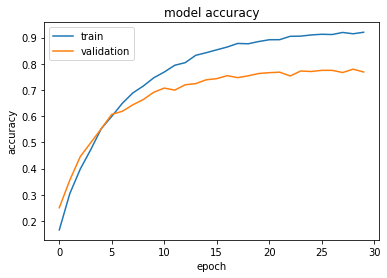

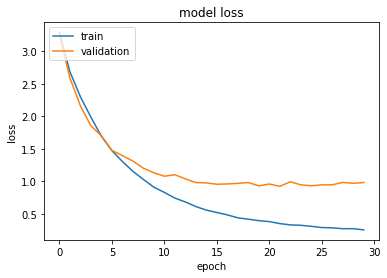

In [90]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [67]:
# Analyze Classification Summary
y_proba = model.predict([X_test])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_test, y_pred, y_proba)

Model accuracy: 71.29%
________________________________________________________________________________
Confusion matrix:
 [[333   0   1 ...   0   0   1]
 [  4  34   0 ...   0   0   0]
 [ 10   0  26 ...   0   0   1]
 ...
 [ 44   1   2 ...  70   0   2]
 [ 37   0   0 ...   0   6   3]
 [ 41   1   1 ...   4   1   6]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.75       400
           1       0.94      0.85      0.89        40
           2       0.84      0.65      0.73        40
           3       0.95      1.00      0.98        40
           4       0.63      0.65      0.64        52
           5       0.88      0.70      0.78        40
           6       0.81      0.75      0.78        40
           7       1.00      0.97      0.99        40
           8       0.67      0.82      0.74        40
           9       0.98      1.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



Observations: Improvement seen in Accuracy

# Summary of Accuracies of the different models

Accuracy on Test Data of the Different Models


| Data | Model | F1-Micro Average | F1- Sample Average |
| --- | --- | --- | --- |
| As given | Unigram Word2Vec | 0.58 |0.48 |
| As given | Glove (200d) | 0.66 |0.59 |
| As given | n-gram Word2Vec | 0.65 |0.56 |
| As given | n-gram Word2Vec (balance groups) | 0.65 |0.58 |
| Re-sampled | n-gram Word2Vec | 0.76 |0.68 |
| Re-sampled | n-gram Word2Vec (balance groups) | 0.77 |0.71 |
| Re-sampled | n-gram Word2Vec (balance groups) + Attention Layer | 0.75 |0.71 |
| Re-sampled | n-gram Word2Vec (balance groups) + 1 Bi-LSTM Layer | 0.77 |0.71 |
| Re-sampled | n-gram Word2Vec (balance groups) + change drop out rate | 0.77 |0.71 |
| Re-sampled | n-gram Word2Vec (balance groups) + Optimizing Adam | 0.77 |0.72 |
| Re-sampled | n-gram Word2Vec (balance groups) + Optimizing Adam + batch normalization | 0.77 |0.72 |
| Re-sampled | Glove (200d) | 0.77 |0.71 |
| Re-sampled | Glove (200d) + Optimizing Adam + batch normalization | 0.77 |0.71 |

The best optimized model seems to be n-gram Word2Vec + Optimizing Adam


# Further Steps

The overall accuracy still leaves a lot to be desired. As future steps, 
- Collect additional data on small groups to improve their accuracy of prediction
- Apply advanced nlp models like Bert, Roberta, Elmo to try and improve accuracy of predictions